In [2]:
from math import ceil, floor
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import powerlaw
import math
plt.rcParams['hist.bins'] = 20

# Distibution Histograms

1000.0

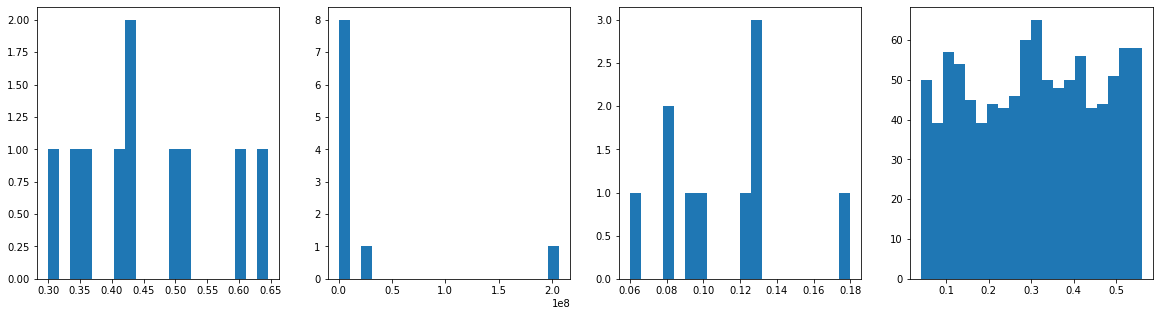

In [3]:
N = 10

fig, ax = plt.subplots(1, 4, figsize=(20,5))

normal_mean = 0.5
normal_stddev = .15
normal_data = np.random.normal(normal_mean, normal_stddev, N)
ax[0].hist(normal_data)

powerlaw_exponent = 1.1
powerlaw_data = powerlaw.Power_Law(, parameters=[powerlaw_exponent]).generate_random(N)
ax[1].hist(powerlaw_data)

poisson_lambda = 10
poisson_data = np.random.poisson(poisson_lambda, N)
ax[2].hist(poisson_data/100)

uniform_mean = 0.3
uniform_stddev = .15
uniform_data = np.random.uniform(uniform_mean - math.sqrt(3)*uniform_stddev, uniform_mean + math.sqrt(3)*uniform_stddev, 1000)
hist = ax[3].hist(uniform_data)
sum(hist[0])


# Poisson approximation

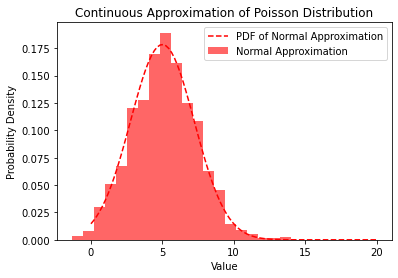

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Poisson distribution
lambda_param = 5  # Mean of the Poisson distribution

# Plot the continuous approximation using the normal distribution
x = np.linspace(0, 20, 100)
normal_approx = norm.pdf(x, lambda_param, np.sqrt(lambda_param))

# Plot the histogram of the normal approximation
plt.hist(np.random.normal(lambda_param, np.sqrt(lambda_param), 1000), bins=20, density=True, alpha=0.6, color='r', label='Normal Approximation')

# Plot the PDF of the continuous normal approximation
plt.plot(x, normal_approx, 'r--', label='PDF of Normal Approximation')

# Show the plot
plt.title('Continuous Approximation of Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


# Analytic function

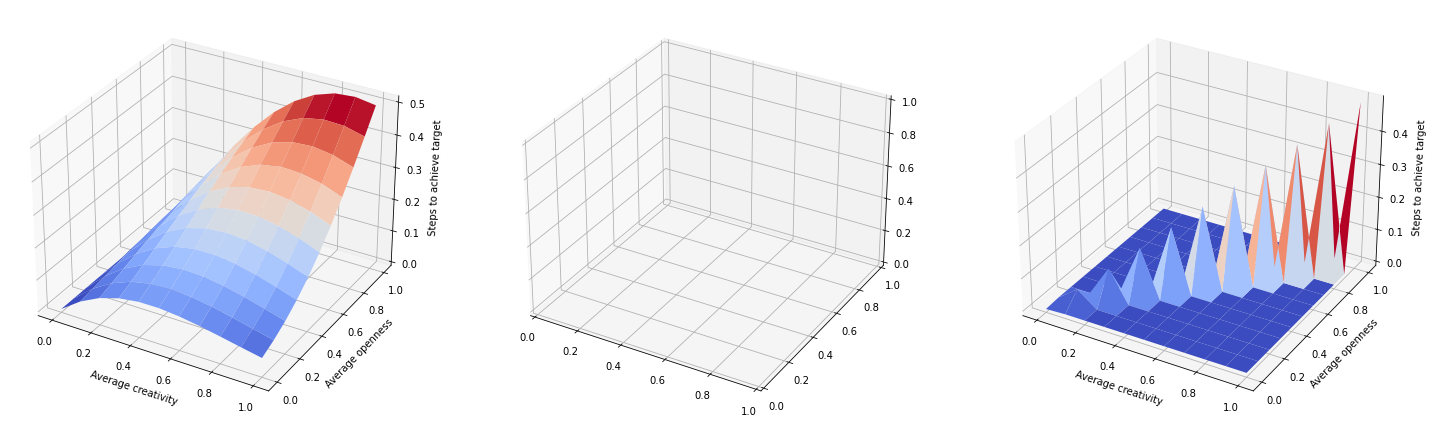

In [11]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

# Define the double Gaussian function
def gaussian(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return (1/(2*np.pi*sigma_x*sigma_y)) * x * np.exp(-(x - mu_x)**2 / (2 * sigma_x**2)) * np.exp(-(y - mu_y)**2 / (2 * sigma_y**2))

def power_law(x, y, kx, ky, xmin):
    return ((kx-1)*(ky-1)/xmin**2) * x * (x/xmin)**(-kx) * (y/xmin)**(-ky)

def uniform_func(x, y, mu_x, mu_y, sigma_x, sigma_y):
    x_min = mu_x - sigma_x*math.sqrt(3)
    x_max = mu_x + sigma_x*math.sqrt(3)
    y_min = mu_y - sigma_y*math.sqrt(3)
    y_max = mu_y + sigma_y*math.sqrt(3)
    if (x > x_min and x < x_max and y > y_min and y < y_max):
        return x/(abs(x_max-x_min))/(abs(y_max-y_min))
    else:
        return 0

fig, ax = plt.subplots(ncols=3, nrows=1, subplot_kw={"projection": "3d"}, figsize=(25, 15))
#  ---------------------------------------------------------------------

resolution_gaussian = 11
sigma_x = .04
sigma_y = .6
X = np.linspace(0,1,resolution_gaussian)
Y = np.linspace(0,1,resolution_gaussian)

Z = np.empty((len(X), len(Y)))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Z[j, i] = dblquad(gaussian, -np.inf, np.inf, -np.inf, (lambda x: x), args=(x, y, sigma_x, sigma_y))[0]
    
XX, YY = np.meshgrid(X, Y)


ax[0].set_xlabel("Average creativity")
ax[0].set_ylabel("Average openness")
ax[0].set_zlabel("Steps to achieve target")
surf = ax[0].plot_surface(XX, YY, Z, cmap=cm.coolwarm, linewidth=0)

# -----------------------------------------------

# xmin = 0.1
# resolution_power = 11
# X = np.linspace(1.1, 2, resolution_power)
# Y = np.linspace(1.1, 2, resolution_power)

# Z = np.empty((len(X), len(Y)))
# for i, x in enumerate(X):
#     for j, y in enumerate(Y):
#         Z[j, i] = dblquad(power_law, .1, 10000, 0, (lambda x: x), args=(x, y, xmin))[0]
    
# XX, YY = np.meshgrid(X, Y)
# ax[1].set_xlabel("Average creativity")
# ax[1].set_ylabel("Average openness")
# ax[1].set_zlabel("Steps to achieve target")
# surf = ax[1].plot_surface(XX, YY, Z, cmap=cm.coolwarm, linewidth=0)

# -----------------------------------------------------
resolution_uniform = 11
sigma_x = .02
sigma_y = .02
X = np.linspace(0,1,resolution_uniform)
Y = np.linspace(0,1,resolution_uniform)

Z = np.empty((len(X), len(Y)))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        Z[j, i] = dblquad(uniform_func, x - x*math.sqrt(3), x + sigma_x*math.sqrt(3), y - sigma_y*math.sqrt(3), (lambda x: x), args=(x, y, sigma_x, sigma_y))[0]
    
XX, YY = np.meshgrid(X, Y)

ax[2].set_xlabel("Average creativity")
ax[2].set_ylabel("Average openness")
ax[2].set_zlabel("Steps to achieve target")
surf = ax[2].plot_surface(XX, YY, Z, cmap=cm.coolwarm, linewidth=0)



In [6]:
import timeit
import math
import numpy as np

# Using math.sqrt
time_math = timeit.timeit('math.sqrt(25.0)', setup='import math', number=1000000)

# Using numpy.sqrt
time_numpy = timeit.timeit('np.sqrt(25.0)', setup='import numpy as np', number=1000000)

print(f'Time for math.sqrt: {time_math}')
print(f'Time for numpy.sqrt: {time_numpy}')


Time for math.sqrt: 0.12996170000042184
Time for numpy.sqrt: 1.2528982999992877
